# Apple Share Price Prediction

# Project Contents

Import Libraries

Import Dataset

Analysing Data

Data Overview

Transforming Data to required format (Using Mean,Median)

Feature Scaling

# Apply Supervised Regression Algorithm

Linear Regression-ML Model Training

Visualizing the result for Polynomial Regression

Implementing Ridge and Lasso Regression

Decision Tree Regression - ML Model Training

K Nearest Neighbor Regression ML Model Training

# Here are the explanation of the columns in the "apple share price prediction.csv"

OPEN : The opening price of that day.

HIGH : The highets price that Apple stocks were negotiated that day.

LOW : The lowest price that Apple stocks were negotiated that day.

CLOSE : The last price negotiated for apple stocks that day.

VOLUME : Total financial volume of all negotiations that were made in           that specific day.

DIVIDENDS : Dividends paid that day.

STOCK SPLITS : Stock splits in that specific day.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("apple share price prediction.csv")
df

,Open,High,Low,Close,Adj Close,Volume
0,19.845715,19.893929,19.715000,19.754642,17.318729,234684800.0
1,19.745001,19.775000,19.301071,19.320715,16.938305,392467600.0
2,19.194643,19.528570,19.057142,19.426071,17.030676,412610800.0
3,19.440001,19.498571,19.211430,19.287144,16.908880,317209200.0
4,19.243214,19.484285,19.238930,19.409287,17.015959,258529600.0
...,...,...,...,...,...,...
1024,43.000000,43.000000,42.514999,42.877499,40.545563,156572000.0
1025,42.540001,42.540001,41.767502,41.990002,39.706345,202561600.0
1026,41.382500,41.842499,41.174999,41.742500,39.472298,184192800.0
1027,41.717499,42.110001,41.625000,41.857498,39.581043,129915600.0


In [3]:
df.shape

(1029, 6)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,19.845715,19.893929,19.715000,19.754642,17.318729,234684800.0
1,19.745001,19.775000,19.301071,19.320715,16.938305,392467600.0
2,19.194643,19.528570,19.057142,19.426071,17.030676,412610800.0
3,19.440001,19.498571,19.211430,19.287144,16.908880,317209200.0
4,19.243214,19.484285,19.238930,19.409287,17.015959,258529600.0


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1015.000000,1023.000000,1023.000000,1011.000000,1015.000000,1.021000e+03
mean,29.580840,29.725692,29.303884,29.512372,26.980804,1.793037e+08
std,6.346527,6.414303,6.367674,6.362801,6.348562,9.894529e+07
min,17.684999,17.911785,17.626785,17.849285,15.648315,4.590360e+07
25%,24.860001,25.116250,24.633750,24.908751,22.466855,1.094008e+08
50%,28.422501,28.629999,28.110001,28.387501,25.844967,1.560840e+08
75%,32.775000,32.947500,32.512501,32.588749,29.381920,2.198064e+08
max,44.842499,45.025002,44.562500,44.814999,42.377697,1.065523e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1015 non-null   float64
 1   High       1023 non-null   float64
 2   Low        1023 non-null   float64
 3   Close      1011 non-null   float64
 4   Adj Close  1015 non-null   float64
 5   Volume     1021 non-null   float64
dtypes: float64(6)
memory usage: 48.4 KB


In [7]:
# Here we count all the total missing valuses
df.isnull().sum()

Open         14
High          6
Low           6
Close        18
Adj Close    14
Volume        8
dtype: int64

In [8]:
mvp= df.isnull().sum()/df.shape[0] * 100
mvp

Open         1.360544
High         0.583090
Low          0.583090
Close        1.749271
Adj Close    1.360544
Volume       0.777454
dtype: float64

<Axes: >

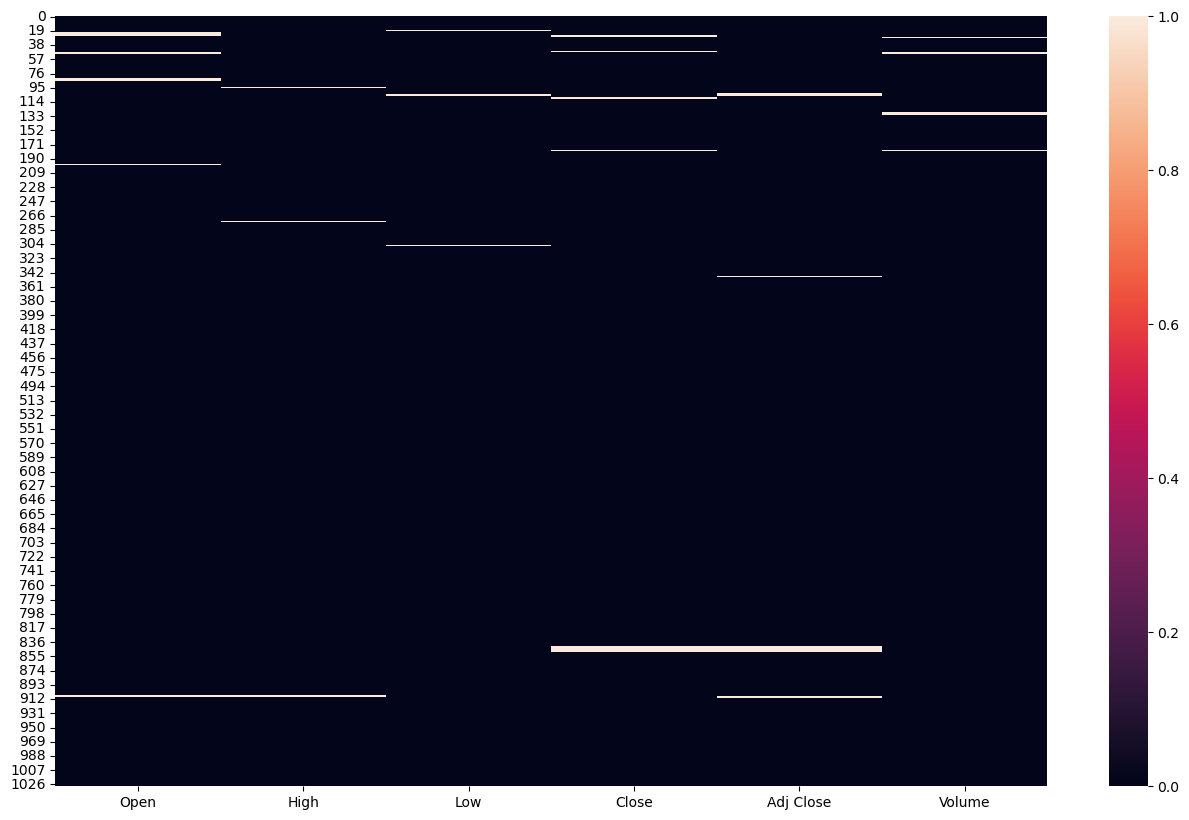

In [9]:
plt.figure(figsize=(16,10))
sns.heatmap(df.isnull())

C:\Users\Harshada Kumbhar\AppData\Local\Temp\ipykernel_5728\2883264804.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], bins=20,
C:\Users\Harshada Kumbhar\AppData\Local\Temp\ipykernel_5728\2883264804.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], bins=20,
C:\Users\Harsh

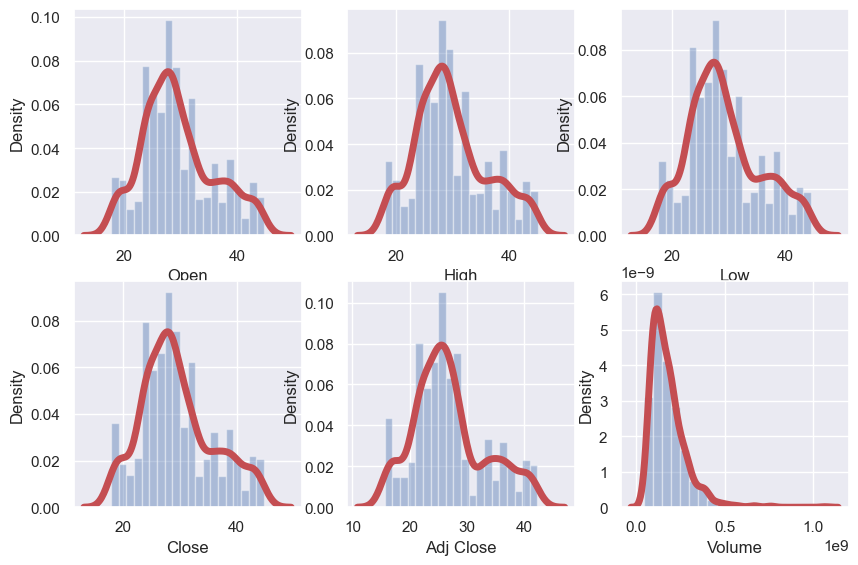

In [10]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(df): 

    plt.subplot(3,3,i+1) 

    
    sns.distplot(df[var], bins=20,
                 kde_kws={'linewidth':5, 'color':'r'})

In [11]:
df_mean = df.fillna(df.mean()) 
#fillna() is used to fill missing values 
### now we fill it using mean

df_mean.isnull().sum().sum()

0

C:\Users\Harshada Kumbhar\AppData\Local\Temp\ipykernel_5728\2847243407.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], bins=20, kde_kws={'linewidth':8, 'color':'red'}, label="Original",) # original dataframe
C:\Users\Harshada Kumbhar\AppData\Local\Temp\ipykernel_5728\2847243407.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/d

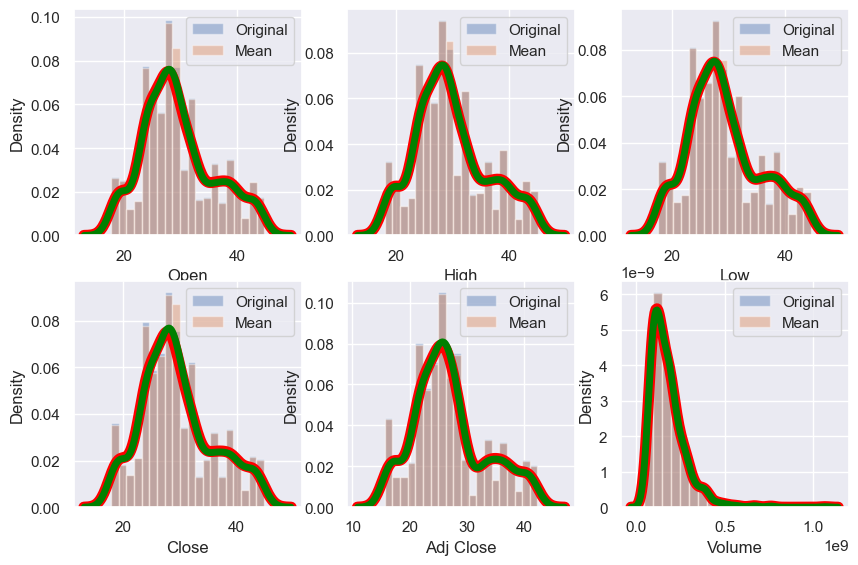

In [12]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(df):
    plt.subplot(3,3,i+1)
    sns.distplot(df[var], bins=20, kde_kws={'linewidth':8, 'color':'red'}, label="Original",) # original dataframe
    sns.distplot(df_mean[var], bins=20, kde_kws={'linewidth':5, 'color':'green'},label="Mean",)
    plt.legend()

In [13]:
df_median = df.fillna(df.median())
df_median.isnull().sum().sum()

0

C:\Users\Harshada Kumbhar\AppData\Local\Temp\ipykernel_5728\182816658.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], bins=20,hist=False, kde_kws={'linewidth':8, 'color':'red'}, label="Original",)
C:\Users\Harshada Kumbhar\AppData\Local\Temp\ipykernel_5728\182816658.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwa

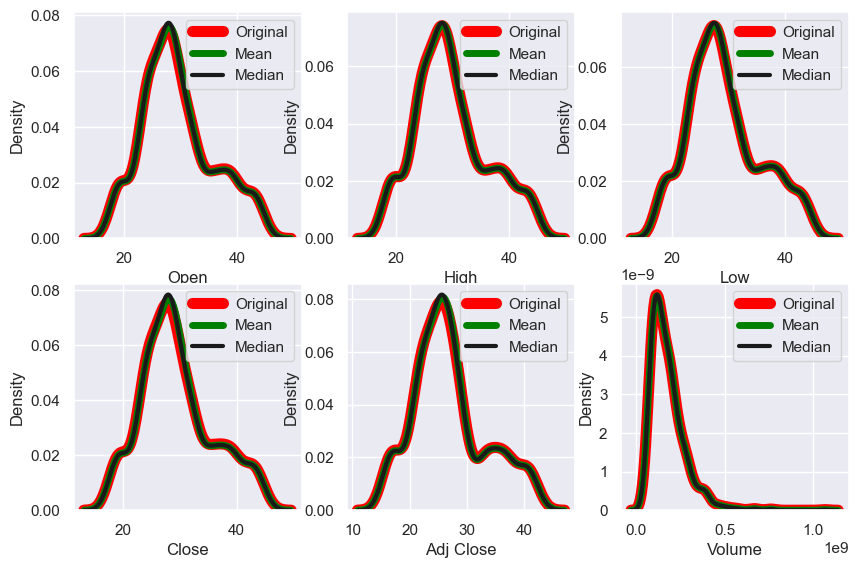

In [14]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(df):
    plt.subplot(3,3,i+1)
    sns.distplot(df[var], bins=20,hist=False, kde_kws={'linewidth':8, 'color':'red'}, label="Original",)
    sns.distplot(df_mean[var], bins=20,hist=False, kde_kws={'linewidth':5, 'color':'green'},label="Mean",)
    sns.distplot(df_median[var], bins=20,hist=False, kde_kws={'linewidth':3, 'color':'k'},label="Median",)
    plt.legend()

In [15]:
df.update(df_median)
df

,Open,High,Low,Close,Adj Close,Volume
0,19.845715,19.893929,19.715000,19.754642,17.318729,234684800.0
1,19.745001,19.775000,19.301071,19.320715,16.938305,392467600.0
2,19.194643,19.528570,19.057142,19.426071,17.030676,412610800.0
3,19.440001,19.498571,19.211430,19.287144,16.908880,317209200.0
4,19.243214,19.484285,19.238930,19.409287,17.015959,258529600.0
...,...,...,...,...,...,...
1024,43.000000,43.000000,42.514999,42.877499,40.545563,156572000.0
1025,42.540001,42.540001,41.767502,41.990002,39.706345,202561600.0
1026,41.382500,41.842499,41.174999,41.742500,39.472298,184192800.0
1027,41.717499,42.110001,41.625000,41.857498,39.581043,129915600.0


In [16]:
null_var=df.isnull().sum()/df.shape[0]*100
null_var

Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

In [17]:
df.update(df_mean)

df

,Open,High,Low,Close,Adj Close,Volume
0,19.845715,19.893929,19.715000,19.754642,17.318729,234684800.0
1,19.745001,19.775000,19.301071,19.320715,16.938305,392467600.0
2,19.194643,19.528570,19.057142,19.426071,17.030676,412610800.0
3,19.440001,19.498571,19.211430,19.287144,16.908880,317209200.0
4,19.243214,19.484285,19.238930,19.409287,17.015959,258529600.0
...,...,...,...,...,...,...
1024,43.000000,43.000000,42.514999,42.877499,40.545563,156572000.0
1025,42.540001,42.540001,41.767502,41.990002,39.706345,202561600.0
1026,41.382500,41.842499,41.174999,41.742500,39.472298,184192800.0
1027,41.717499,42.110001,41.625000,41.857498,39.581043,129915600.0


<Axes: >

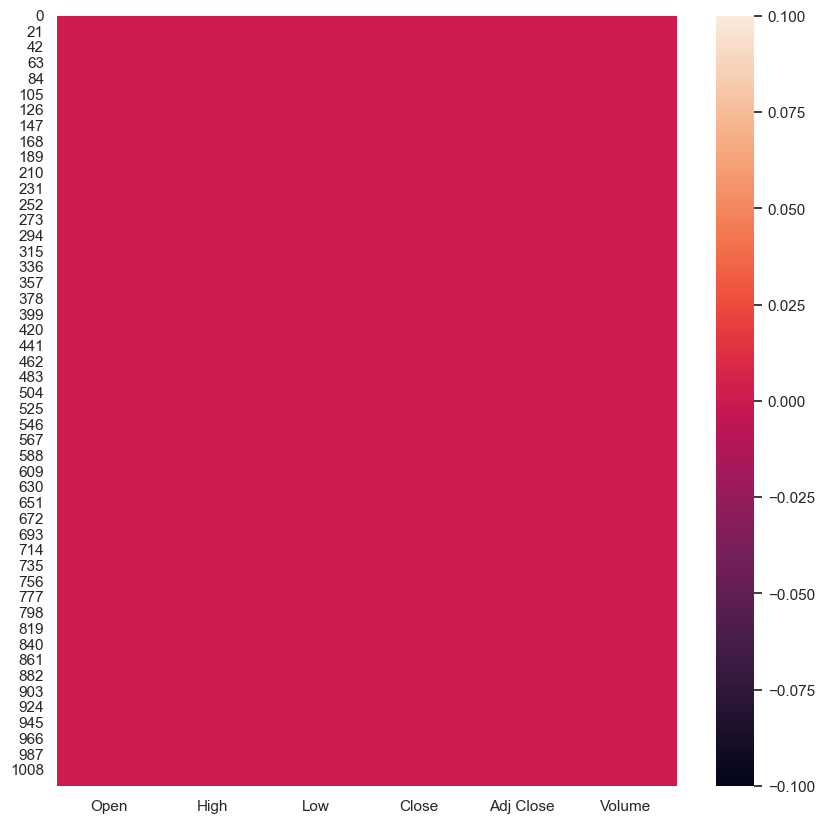

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [19]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1029 non-null   float64
 1   High       1029 non-null   float64
 2   Low        1029 non-null   float64
 3   Close      1029 non-null   float64
 4   Adj Close  1029 non-null   float64
 5   Volume     1029 non-null   float64
dtypes: float64(6)
memory usage: 48.4 KB


Next, we define the explanatory variables. Explanatory variables are used to predict the 
Apple price for the next trading day. We will use 10-day 
moving average and correlation to make the prediction.

# Splite the Data

In [21]:
#Define target variable
X=df.drop('Adj Close', axis=1) # x define independent variable
y=df['Adj Close'] # y define dependent variable

print("Shape of x=" ,X.shape)
print("Shape of y=",y.shape)

Shape of x= (1029, 5)
Shape of y= (1029,)


In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (823, 5)
Shape of y_train =  (823,)
Shape of X_test =  (206, 5)
Shape of y_test =  (206,)


# Feature Scaling

In [182]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [183]:
sc.fit(X_train)

StandardScaler()

In [184]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [185]:
sc.mean_

array([2.95832358e+01, 2.97192452e+01, 2.93091869e+01, 2.95051413e+01,
       1.79246120e+08])

In [186]:
sc.scale_

array([6.33816856e+00, 6.44021259e+00, 6.38728219e+00, 6.35367660e+00,
       9.71721066e+07])

In [187]:
X_train_sc

array([[-0.29475954, -0.25026273, -0.2597642 , -0.23217118, -0.73038367],
       [ 0.11111484,  0.09755184,  0.13242155,  0.1310042 ,  0.18068848],
       [ 1.04119401,  1.04705492,  1.06239463,  1.08242185, -1.03032571],
       ...,
       [ 1.00924481,  0.9814514 ,  1.02051425,  1.01395734, -1.25818946],
       [-0.46752227, -0.45833042, -0.44372339, -0.46786171, -0.7865644 ],
       [-0.20837803, -0.18465921, -0.18500613, -0.17511772, -0.42387596]])

# Linear Regression-ML Model Training

In [188]:
# Lets create Regression model:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

regression.fit(X_train,y_train)

LinearRegression()

In [234]:
regression.score(X_test,y_test)

0.9824177318643708

In [189]:
y_pred=regression.predict(X_test)
y_pred

array([26.46820423, 21.52936066, 22.82636691, 21.20980746, 21.62843615,
       23.82038186, 28.21334013, 24.82026407, 16.70902931, 21.9320121 ,
       32.07814693, 27.95246281, 24.76412446, 33.49995049, 29.5207413 ,
       26.91071064, 29.13042882, 32.75183692, 26.63675734, 28.85175899,
       23.8422103 , 24.94343206, 24.93935396, 32.31658014, 24.8054004 ,
       22.05718377, 20.38117658, 21.83941106, 25.91529578, 29.66316546,
       33.51251891, 26.98254379, 25.93282783, 17.0339989 , 26.6182398 ,
       24.14608286, 18.4452023 , 24.44029381, 24.64091352, 22.54775696,
       16.57737545, 24.71473116, 34.8458507 , 32.32464199, 28.0719497 ,
       16.87005306, 36.53697288, 33.17887089, 16.63349548, 17.05993865,
       35.35225374, 33.31746621, 21.98932028, 24.02087566, 33.39499058,
       28.04212001, 29.30971328, 21.36046144, 21.93530525, 25.6511586 ,
       27.02234944, 22.46227875, 21.58565861, 19.26011153, 16.59110504,
       21.66152618, 36.44545446, 39.69841464, 36.50027863, 24.84

In [190]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [191]:
mean_absolute_error(y_test,y_pred)

0.426679101928726

In [192]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.8092043780971279

In [193]:
df['Adj Close'].describe()

count    1029.000000
mean       26.980804
std         6.305184
min        15.648315
25%        22.497736
50%        25.932518
75%        29.332724
max        42.377697
Name: Adj Close, dtype: float64

# Visualizing the result for Polynomial Regression

we have used plr.fit_transform(x), because first we are converting our feature matrix into polynomial feature matrix, and then fitting it to the Polynomial regression model. The parameter value(degree= 2) depends on our choice. We can choose it according to our Polynomial features.

After executing the code, we will get another matrix x_poly

we have used another LinearRegression object, namely lr_1, to fit our x_poly vector to the linear model.

In [194]:
# Fitting the Polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

In [195]:
poly_reg=PolynomialFeatures(degree=2)
poly_reg.fit(X_train)
X_train_poly=poly_reg.transform(X_train)
X_test_poly=poly_reg.transform(X_test)

In [196]:
X_train_poly.shape, X_test_poly.shape


((823, 21), (206, 21))

In [197]:
lr=LinearRegression()

lr.fit(X_train_poly, y_train)

LinearRegression()

In [198]:
lr.score(X_test_poly, y_test)

0.9848823823051502

In [199]:
lr.predict([X_test_poly[0,:]])

array([26.07745117])

In [200]:
y_pred=lr.predict(X_test_poly)
y_pred

array([26.07745117, 21.09478782, 22.50612866, 21.51923412, 22.31185105,
       21.69806126, 27.80434296, 24.76349376, 16.60923865, 18.77530861,
       31.68910233, 27.66838236, 24.47904235, 33.15545765, 29.11338317,
       26.57905165, 28.81248545, 32.30122656, 26.48132564, 28.47650555,
       23.69542633, 24.95123918, 24.76612083, 31.89200418, 24.77234568,
       22.81780432, 20.30329258, 21.58020643, 25.93511756, 29.20352916,
       33.09569542, 26.84266042, 25.54598304, 16.58100524, 26.41586056,
       24.29321684, 18.67498897, 24.32708508, 24.7674442 , 22.45336694,
       17.82168977, 24.79280862, 34.59029515, 31.89691682, 27.69014684,
       16.66648605, 36.39936883, 33.03047608, 18.14166766, 17.63914952,
       35.21066114, 32.86994389, 21.92608035, 23.70016071, 32.92754977,
       27.66144117, 28.87547189, 21.27067617, 22.13323531, 25.27263068,
       26.73944554, 22.56409166, 21.35555016, 19.80860306, 16.5003852 ,
       21.85039025, 36.20123035, 40.17919161, 36.33618978, 24.77

In [201]:
y_test

746    26.981829
513    22.106613
175    22.651789
527    21.514900
622    21.998142
         ...    
503    23.956991
902    36.870594
649    24.415520
658    25.040817
249    25.491388
Name: Adj Close, Length: 206, dtype: float64

# Implementing Ridge and Lasso Regression

In [202]:
from sklearn.linear_model import Ridge, Lasso

In [203]:
rd = Ridge()

rd.fit(X_train,y_train)

rd.score(X_test,y_test)

C:\Users\Harshada Kumbhar\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.60985e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.9824196669594348

In [204]:
ls = Lasso()

ls.fit(X_train,y_train)

ls.score(X_test,y_test)

0.9816756407229712

In [205]:
rd2 = Ridge(alpha=2)

rd2.fit(X_train,y_train)

rd2.score(X_test,y_test)

C:\Users\Harshada Kumbhar\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.6188e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.9824215934627011

In [206]:
ls2 = Lasso(alpha=2)

ls2.fit(X_train,y_train)

ls2.score(X_test,y_test)

0.9794260082426435

# Decision Tree Regression - ML Model Training

In [207]:
from sklearn.tree import DecisionTreeRegressor

In [208]:
regressor = DecisionTreeRegressor(criterion='squared_error')

regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [209]:
y_pred=regressor.predict(X_test)
print(y_test)

746    26.981829
513    22.106613
175    22.651789
527    21.514900
622    21.998142
         ...    
503    23.956991
902    36.870594
649    24.415520
658    25.040817
249    25.491388
Name: Adj Close, Length: 206, dtype: float64


In [210]:
regressor.predict(X_test)

array([26.42643166, 21.73377609, 22.64510918, 21.5538044 , 21.38394928,
       20.60409737, 27.83539391, 25.19591331, 17.09768105, 16.6620369 ,
       32.51295853, 27.41404915, 24.37641525, 33.80860901, 29.90406036,
       26.86343002, 28.79196548, 32.91955948, 26.99346161, 28.41158295,
       23.7190094 , 25.24915123, 25.0129509 , 32.51295853, 24.58744049,
       22.43787384, 20.2382679 , 22.49773598, 26.16809845, 28.87889099,
       33.67663956, 27.23542976, 26.7560463 , 17.26801109, 26.99346161,
       24.42108917, 18.71255112, 24.98758316, 24.93665695, 22.75072289,
       16.75117493, 25.18664742, 34.89732742, 32.48024368, 27.41404915,
       18.0148735 , 36.87640381, 33.6322403 , 16.71747589, 17.09768105,
       35.46307755, 33.56915283, 21.81245041, 23.7190094 , 33.56447601,
       27.41404915, 28.51268387, 21.19386292, 22.45312309, 25.28326797,
       27.05688667, 22.79933357, 21.54861069, 19.20411873, 16.90888023,
       21.91771126, 36.74214172, 39.9711113 , 36.8057518 , 24.94

In [211]:
regressor.score(X_test,y_test)

0.9904570544947221

In [212]:
X_test.iloc[-1,:]

Open      2.844750e+01
High      2.869250e+01
Low       2.842500e+01
Close     2.847750e+01
Volume    1.103956e+08
Name: 249, dtype: float64

In [213]:
regressor.predict([X_test.iloc[-1,:]])

C:\Users\Harshada Kumbhar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([26.36253357])

In [214]:
y_test.iloc[-1]

25.49138832

In [215]:
pred=regressor.predict(X_test)
pred

array([26.42643166, 21.73377609, 22.64510918, 21.5538044 , 21.38394928,
       20.60409737, 27.83539391, 25.19591331, 17.09768105, 16.6620369 ,
       32.51295853, 27.41404915, 24.37641525, 33.80860901, 29.90406036,
       26.86343002, 28.79196548, 32.91955948, 26.99346161, 28.41158295,
       23.7190094 , 25.24915123, 25.0129509 , 32.51295853, 24.58744049,
       22.43787384, 20.2382679 , 22.49773598, 26.16809845, 28.87889099,
       33.67663956, 27.23542976, 26.7560463 , 17.26801109, 26.99346161,
       24.42108917, 18.71255112, 24.98758316, 24.93665695, 22.75072289,
       16.75117493, 25.18664742, 34.89732742, 32.48024368, 27.41404915,
       18.0148735 , 36.87640381, 33.6322403 , 16.71747589, 17.09768105,
       35.46307755, 33.56915283, 21.81245041, 23.7190094 , 33.56447601,
       27.41404915, 28.51268387, 21.19386292, 22.45312309, 25.28326797,
       27.05688667, 22.79933357, 21.54861069, 19.20411873, 16.90888023,
       21.91771126, 36.74214172, 39.9711113 , 36.8057518 , 24.94

In [216]:
y_test

746    26.981829
513    22.106613
175    22.651789
527    21.514900
622    21.998142
         ...    
503    23.956991
902    36.870594
649    24.415520
658    25.040817
249    25.491388
Name: Adj Close, Length: 206, dtype: float64

In [217]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [218]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.24634484148208913


In [219]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.3554053757320329


In [220]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.5961588510892318


In [221]:
from sklearn.metrics import r2_score

In [222]:
print("R_squared",r2_score(y_test,y_pred))

R_squared 0.9904570544947221


# Mean Absolute Error(MAE)

In [231]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.24634484148208913


# Mean Squared Error[MSE]

In [232]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.3554053757320329


# Root Mean Squared Error

In [233]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.5961588510892318
